# Cancer Screening

Some skeleton code has been provided below. Please follow the structure outlined. Your code should be added to the **process_image()** function. Please leave the final 4 lines of code as is, the filenames should be hardcoded and both images should be handled by the process_image function. The code inside process_image can be removed and is there for example only.

Image Processing Assignment 2<br>
Damian Wojtowicz<br>
C17413722<br>

## Research

The research began with looking at research papers that tackle the same problem of segmenting cells with OpenCV. Li *et al.* (2019) **[1]** have investigated the segmentation of cells with OpenCV and introduced me to the use of distance transformation and the watershed algorithm as a means of segmenting cells. Their research has provided me with insight on the topic that served as a starting point for research which led me to create my own solution to the problem.<br>
<br>
After seeing their results I further researched the OpenCV watershed function/algorithm **[2]** to learn about how it works and how it can be applied to the cellular microscopy images. The watershed function works by segmenting the image that contains various region. There are marked regions which represent the center of a cell, there is a background region which is where the cells are definitely not and finally an unkown region which lies between the marked regions and the background. This unkown region is assigned/split amongst each of the markers.
<br><br>
Throughout my research on the watershed algorithm I came across the morhological operations **[3]** that were taught in this module which were crutial in the watershed algorithm. These were useful in many ways which include better defining the region of interest with the use of morpholigical Ex close and open functions which fill in holes in the ROI and remove noise.
The morhological operations which of course involve dilation and/or erosion were used to better define the regions. Regions where we are sure the cell is and where it is not.
<br><br>
I also learned about the OpenCV distanceTransform function **[4]** which is important in the watershed algorithm. The function is used to produce a gray level image which intensifies the foreground region. This shows where the edge of the cell and center of the cell is which plays a great role in the segmentation process.
<br><br>
The connectedComponents OpenCV function **[5]** was used to label each segment with its own unique grayscale value which was very useful in segmenting the cells. This is because we can filter out the clicked region by the pixel value as that pixel value is unique.
<br><br>
Canny edge detection **[6]**, which was taught in the module was useful in determining the edges between the cells and I discovered that it greatly increased the accuracy in the segmentation process by combining the edges with the threshold of the cells. The contours functions, also taught in this module were very helpful in filtering out the edges obtained with Canny edge detection. Filtering the contours by size and ignoring any contours that were too small has improved the effectiveness of the algorithm. The contours functions **[7]** also proved useful for displaying the progress of the algorithm and to higlight the region that will be clicked by the user as to improve the usability aspect of the program.

### References
1\. Li G, Zhang Y, Xu B, Li X. Image Analysis and Processing of Skin Cell Injury Based on OpenCV.<br>&nbsp;&nbsp;&nbsp; 
    Journal of Physics: Conference Series [Internet]. 2019 Jun<br>&nbsp;&nbsp;&nbsp; 
    [cited 2020 Nov 22];1237:032003. Available from: https://iopscience.iop.org/article/10.1088/1742-6596/1237/3/032003<br>
    <br>
2\. OpenCV: Image Segmentation with Watershed Algorithm [Internet]. Opencv.org. 2020<br>&nbsp;&nbsp;&nbsp; 
    [cited 2020 Nov 22]. Available from: https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html<br>
    <br>
3\. OpenCV: Morphological Transformations [Internet]. Opencv.org. 2020 [cited 2020 Nov 22].<br>&nbsp;&nbsp;&nbsp; 
    Available from: https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html<br>
    <br>
4\. OpenCV: Miscellaneous Image Transformations [Internet]. Opencv.org. 2020 [cited 2020 Nov 22].<br>&nbsp;&nbsp;&nbsp; 
    Available from: https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga25c259e7e2fa2ac70de4606ea800f12f<br>
    <br>
5\. OpenCV: Structural Analysis and Shape Descriptors [Internet]. Opencv.org. 2020 [cited 2020 Nov 22].<br>&nbsp;&nbsp;&nbsp; 
    Available from: https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#gac2718a64ade63475425558aa669a943a<br>
    <br>
6\. Canny Edge Detection — OpenCV-Python Tutorials 1 documentation [Internet]. Readthedocs.io. 2013 [cited 2020 Nov 22].<br>&nbsp;&nbsp;&nbsp; 
    Available from: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html<br>
    <br>
7\. OpenCV: Contours : Getting Started [Internet]. Opencv.org. 2020 [cited 2020 Nov 22].<br>&nbsp;&nbsp;&nbsp; 
    Available from: https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html<br>

## The Algorithm
<br>
The algorithm is broken up into 3 stages/sections. The pre-processing stage, the segmentation stage, and finally the image selection stage.<br>
I will be discussing these below.<br>

### Image Pre-processing
To summarize the pre-processing we get the region of interest, get the edges, filter the edges, and put the edges on top of the region of interest.<br>
<br>
1\. The image is converted to the various colour spaces such as RGB and Gray. The gray image is what will be processed and<br>&nbsp;&nbsp;&nbsp;
    the colour image will be used for display purposes.<br>
2\. We obtain the ROI of all the cells with a threshold, the threshold value is calculated by adding the mean value and the standard<br>&nbsp;&nbsp;&nbsp; 
    deviation of the pixels.<br>
3\. The cells ROI noise is removed with Morphological Ex Open and any pockets within the ROI are filled in/closed with the Morphological Ex Close.<br>
4\. Canny edge detection is used to obtain the edges on the image. These edges outline the cells, however there is noise which needs to be removed/filtered.
5\. Contours of the edges of the canny edge detection image from the previous step are obtained and filtered by size. This removed the noise edges <br>&nbsp;&nbsp;&nbsp; 
    that were too small and in most cases this also removed the outline of the nucleus which increases the accuracy.<br>
6\. The final result is a binary image with the region of interest in white on a black background with black lines within the region of interst<br>&nbsp;&nbsp;&nbsp; 
    that roughly separating the cells.

### Segmentation
1\. We use the image that has been pre-processed and then dilate it with a 3x3 kernel. This will give us the "Sure background" iamge.<br>&nbsp;&nbsp;&nbsp; 
    The black within that region is definitely the background and this image will be used in the calculation of the "unknown" region that<br>&nbsp;&nbsp;&nbsp; 
    I will explain in the following steps.<br>
2\. We use the distanceTransform() method which produces a gray level image which intensifies the foreground region.<br>&nbsp;&nbsp;&nbsp;
    The pixels closer to the boundary are darker and the further away pixels from the boundary are lighter in shade. This allows us<br>&nbsp;&nbsp;&nbsp; 
    to obtain the "center" of a the cells.<br>
3\. The result of the distanceTransform() is thresholded to give us the "sure foreground". By using the treshold we get the lighter values<br>&nbsp;&nbsp;&nbsp; 
    which we are certain is the foreground as they are the furthest away from the boundary.<br>
4\. We then get the unknown region which lies between the sure background and the sure foreground by subtracting one from the other.<br>
5\. The connectedComponents() method is used to assign a specific shade of gray to each of the sure foreground segments. These gray<br>&nbsp;&nbsp;&nbsp;
    segments are known as markers.
6\. The value 1 is added to each pixel value so that the background colour is not 0. This step is important as we do not want the watershed<br>&nbsp;&nbsp;&nbsp; 
    to confuse the background region with the unknown region. It expects the unknown region to be 0, hence why the background is of value 1.
7\. Next we take the "markers" image from the previous step and set the pixel value to 0 where the value at the same row and column in the<br>&nbsp;&nbsp;&nbsp;
    unknown background image is 255. In other words we make the unknown background region on the markers image black.<br>&nbsp;&nbsp;&nbsp;
    To recap we now have an image with the background of value 1, the unknown region of value 0 and markers of value greater than 1.<br>
8\. Then we pass the original image and the markers image to the watershed() method and it will assign the unknown region<br>&nbsp;&nbsp;&nbsp; 
    to each marker and that will segment the cells.

### Cell Selection
There are two parts to the cell selection. There is the onclick part and the hover part.<br>
When the user hovers over the cell it will be contoured in red<br>
When a user clicks on a cell it will be isolated, cropped, enlarged by 4 times, saved to the file and displayed to the user<br>
The original window will close.<br>
I decided to go with an image resize factor of 4 because 2 did not seem large enough and I did not want to multiply by an odd number<br>
as that could result in undesired distortion.

#### On Click
1\. The displayImgs and displayTitles variables are used to store the images for the algorithm progress display purposes (images for plotting with matplotlib).<br>&nbsp;&nbsp;&nbsp; 
2\. If the left mouse button is clicked then we get the colour of the pixel that was clicked on the segmented image.<br>&nbsp;&nbsp;&nbsp; 
    Each segment has their own unique grayscale colour and so we now have a pixel value that uniquely identifies that segmented cell<br>&nbsp;&nbsp;&nbsp;
3\. If the pixel that was clicked is of value 1 then it is the background and we do not enhance the image as there is nothing to enhance.<br>&nbsp;&nbsp;&nbsp; 
    Otherwise we go through the next steps to segment and enlarge the image.<br>
4\. Using that pixel value we use a threshold to create a mask that isolates that segmented cell.<br>
5\. Next the algorithm gets a contour of that mask, this contour is sorted to get the largest one at 0th index.<br>&nbsp;&nbsp;&nbsp; 
    This step is not necessary as there should only be one and only one contour but I do it to be safe.<br>
6\. Using the contour we get the bounding box of the cell and we crop the cell out of the image.<br>
7\. We resize the cropped cell image to 4 times it's original size<br>
8\. We save the image to the file<br>
9\. We display the enhanced image to the user on screen and close the previous window<br>
    
#### On Hover
1\. Anytime the user is not clicking the on hover functionality is called. Firstly the pixel colour of the segmented shaded region is obtained.<br>&nbsp;&nbsp;&nbsp; 
    Just as with the onClick functionality.<br>
2\. If the user is not hovering over a background pixel (meaning they are hovering over a cell) <br>&nbsp;&nbsp;&nbsp; 
    then we create a mask of the cell using a threshold function and we obtain the contours of the thresholded image. Again, this process is the same as<br>&nbsp;&nbsp;&nbsp; 
    with the onClick functionality where we isolate the cell<br>
3\. The contours are drawn in red on top of the copy of the image and displayed to the user. We draw it on top of the copy so that<br>&nbsp;&nbsp;&nbsp; 
    the contours do not stay after the user stops hovering over the cell.<br>

## Conclusion
The program/algorithm has been tested on 7 other images of similar nature and have performed very well on all of them. The results can be viewed in the "Results" folder and the original images are in the main folder. The algorithm is general enough so that it works on similar images. The algorithm is also efficient and runs fast, even when the images are large in size. For example, "Cervical Mono.jpg" contains over a million pixels and still loads very quickly.<br>
The program has the necessary error checking to ensure that it doesn't crash in any scenario. Even when the user has not clicked on an image and exited the program.<br>
The intructions in the beginning simply detail exactly how the program works and the program is very clear and simple.<br>
Contours are drawn around the cell that is hovered over to make the program more transparent and make the user experience enjoyable.<br>
Existing solutions to the problem have been researched and an original solution has been created. The research sources have been cited with the Vancouver citation style.<br>
The progression of the algorithm is displayed with matplotlib in a sequential manner with titles above each image describing the image.


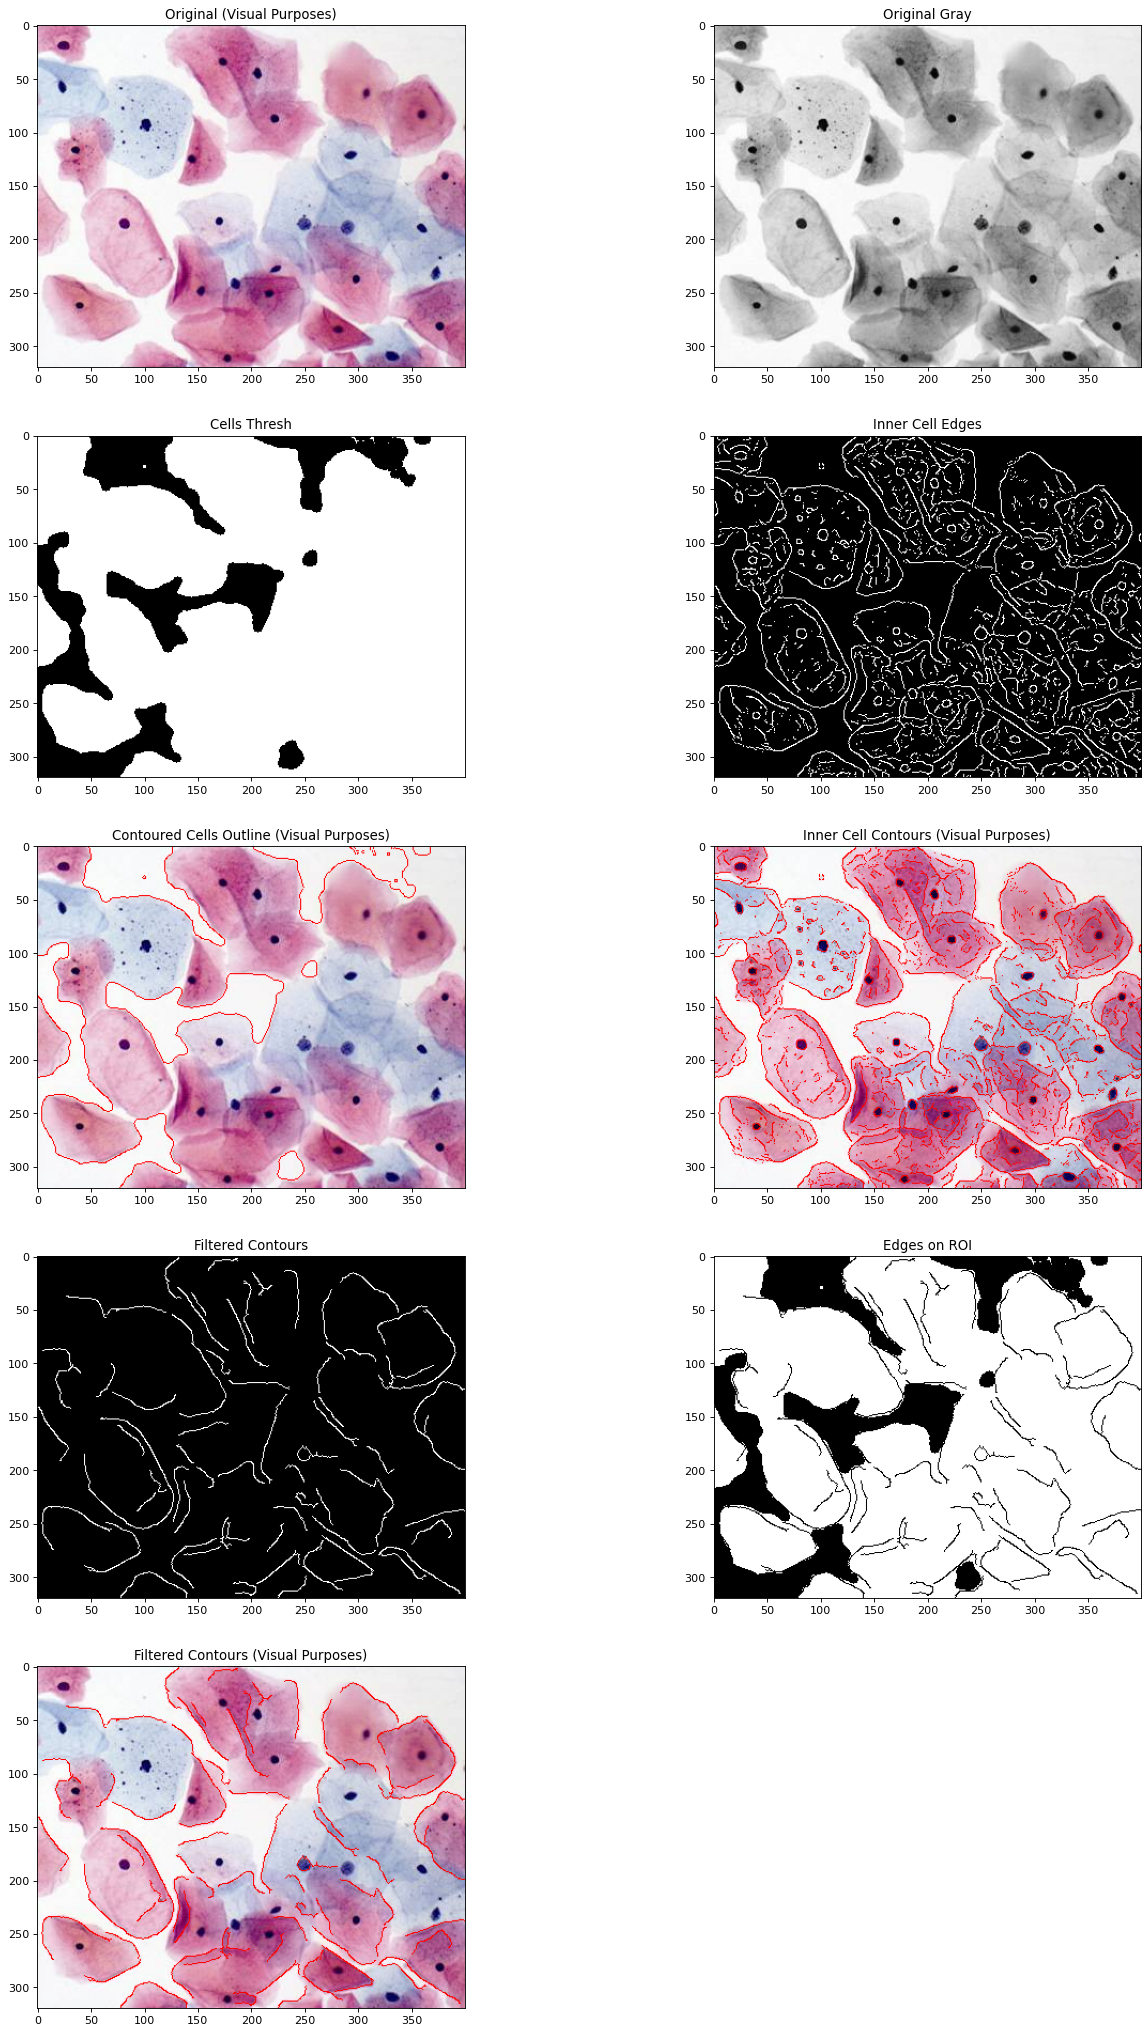

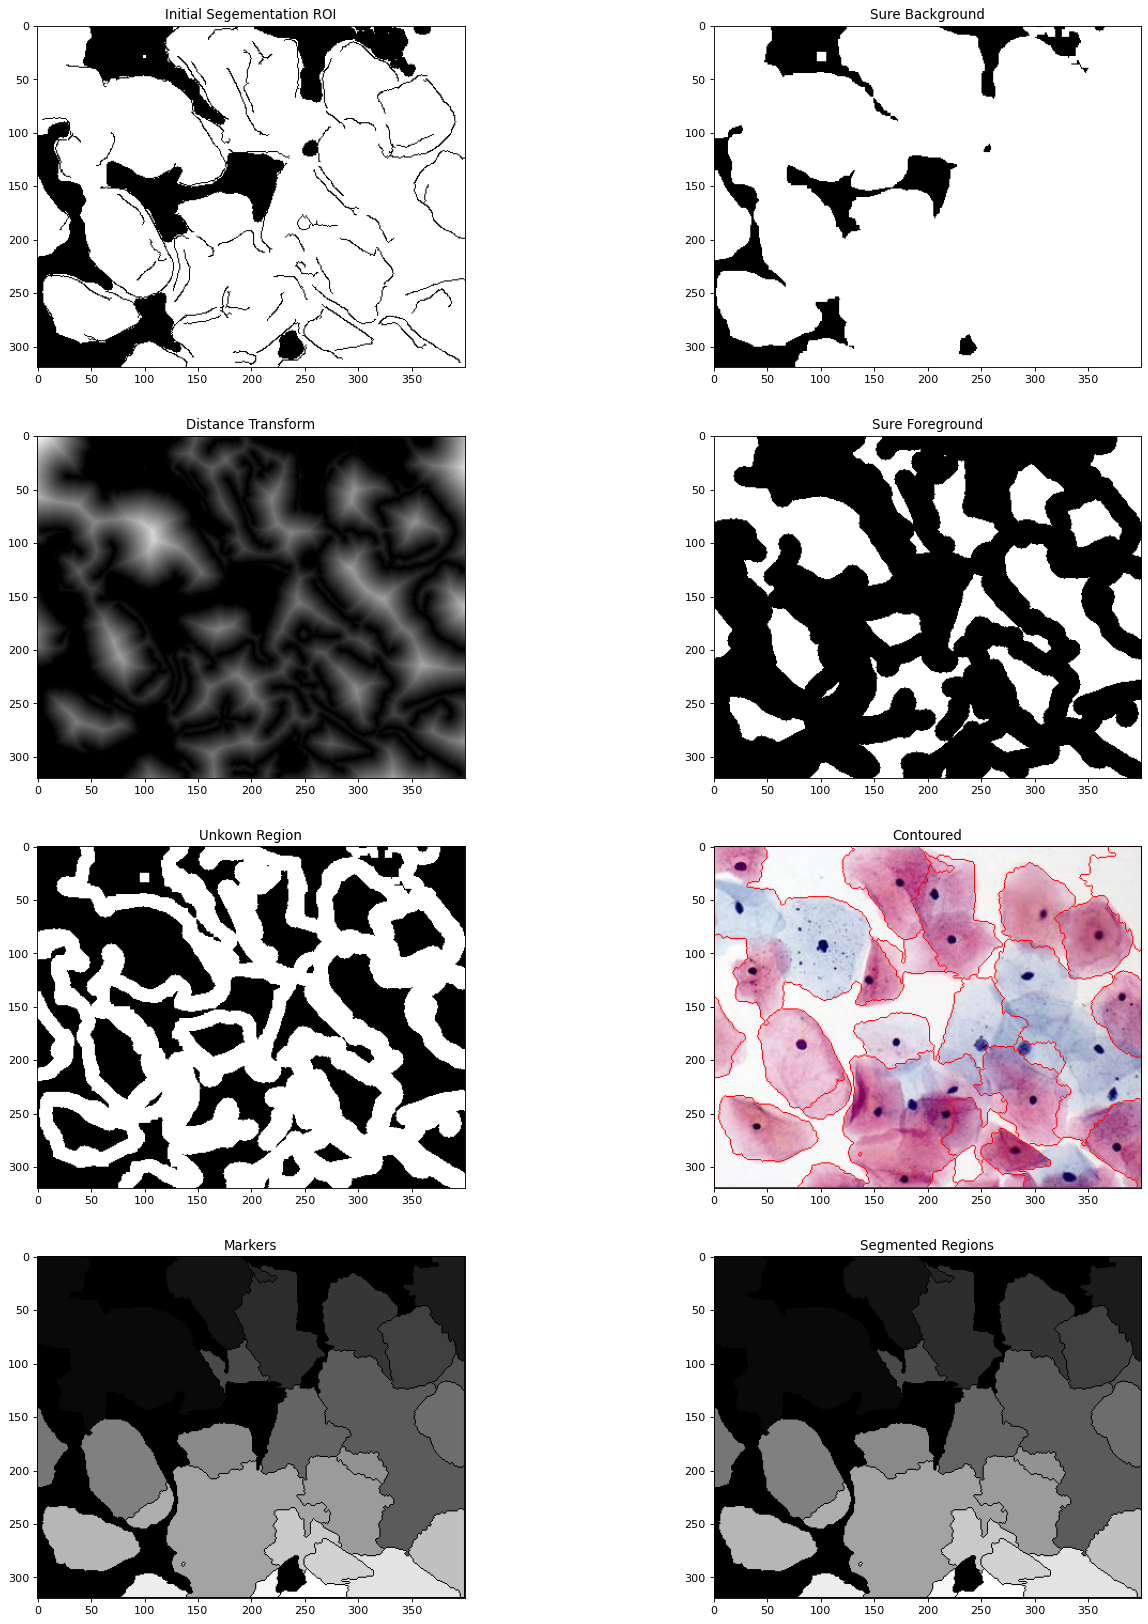

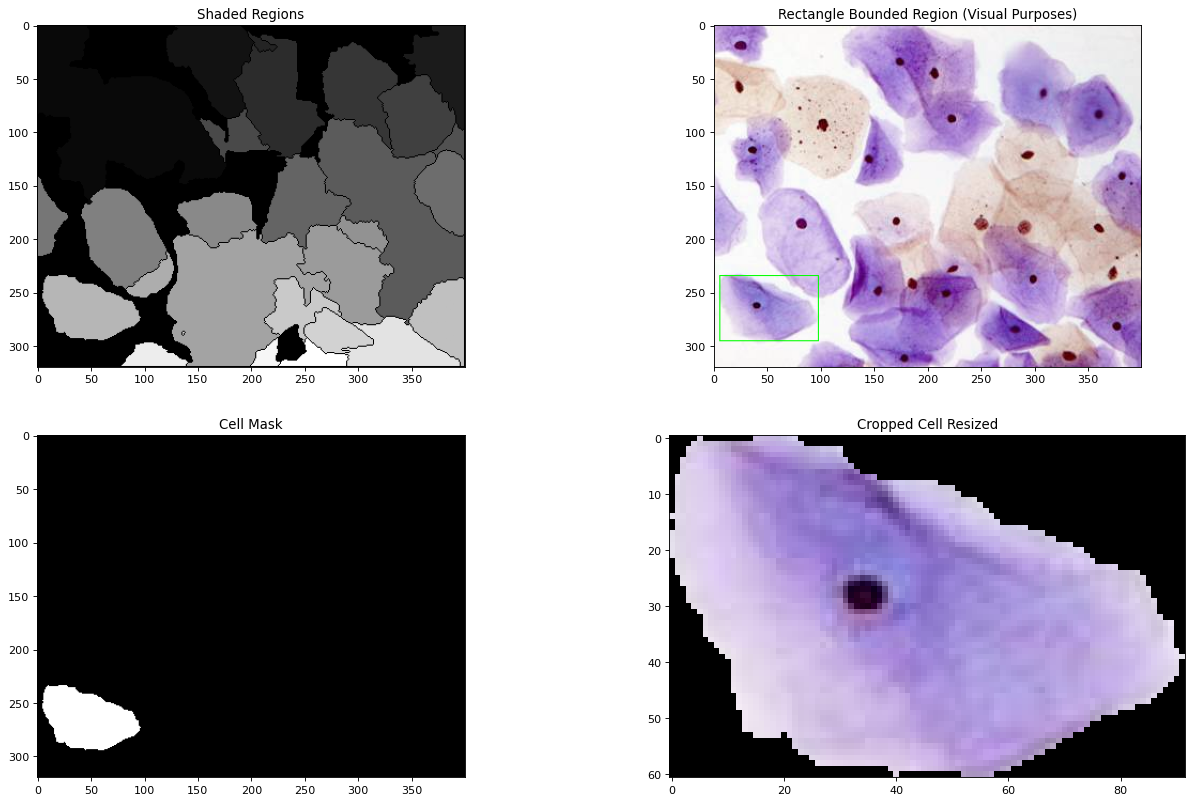

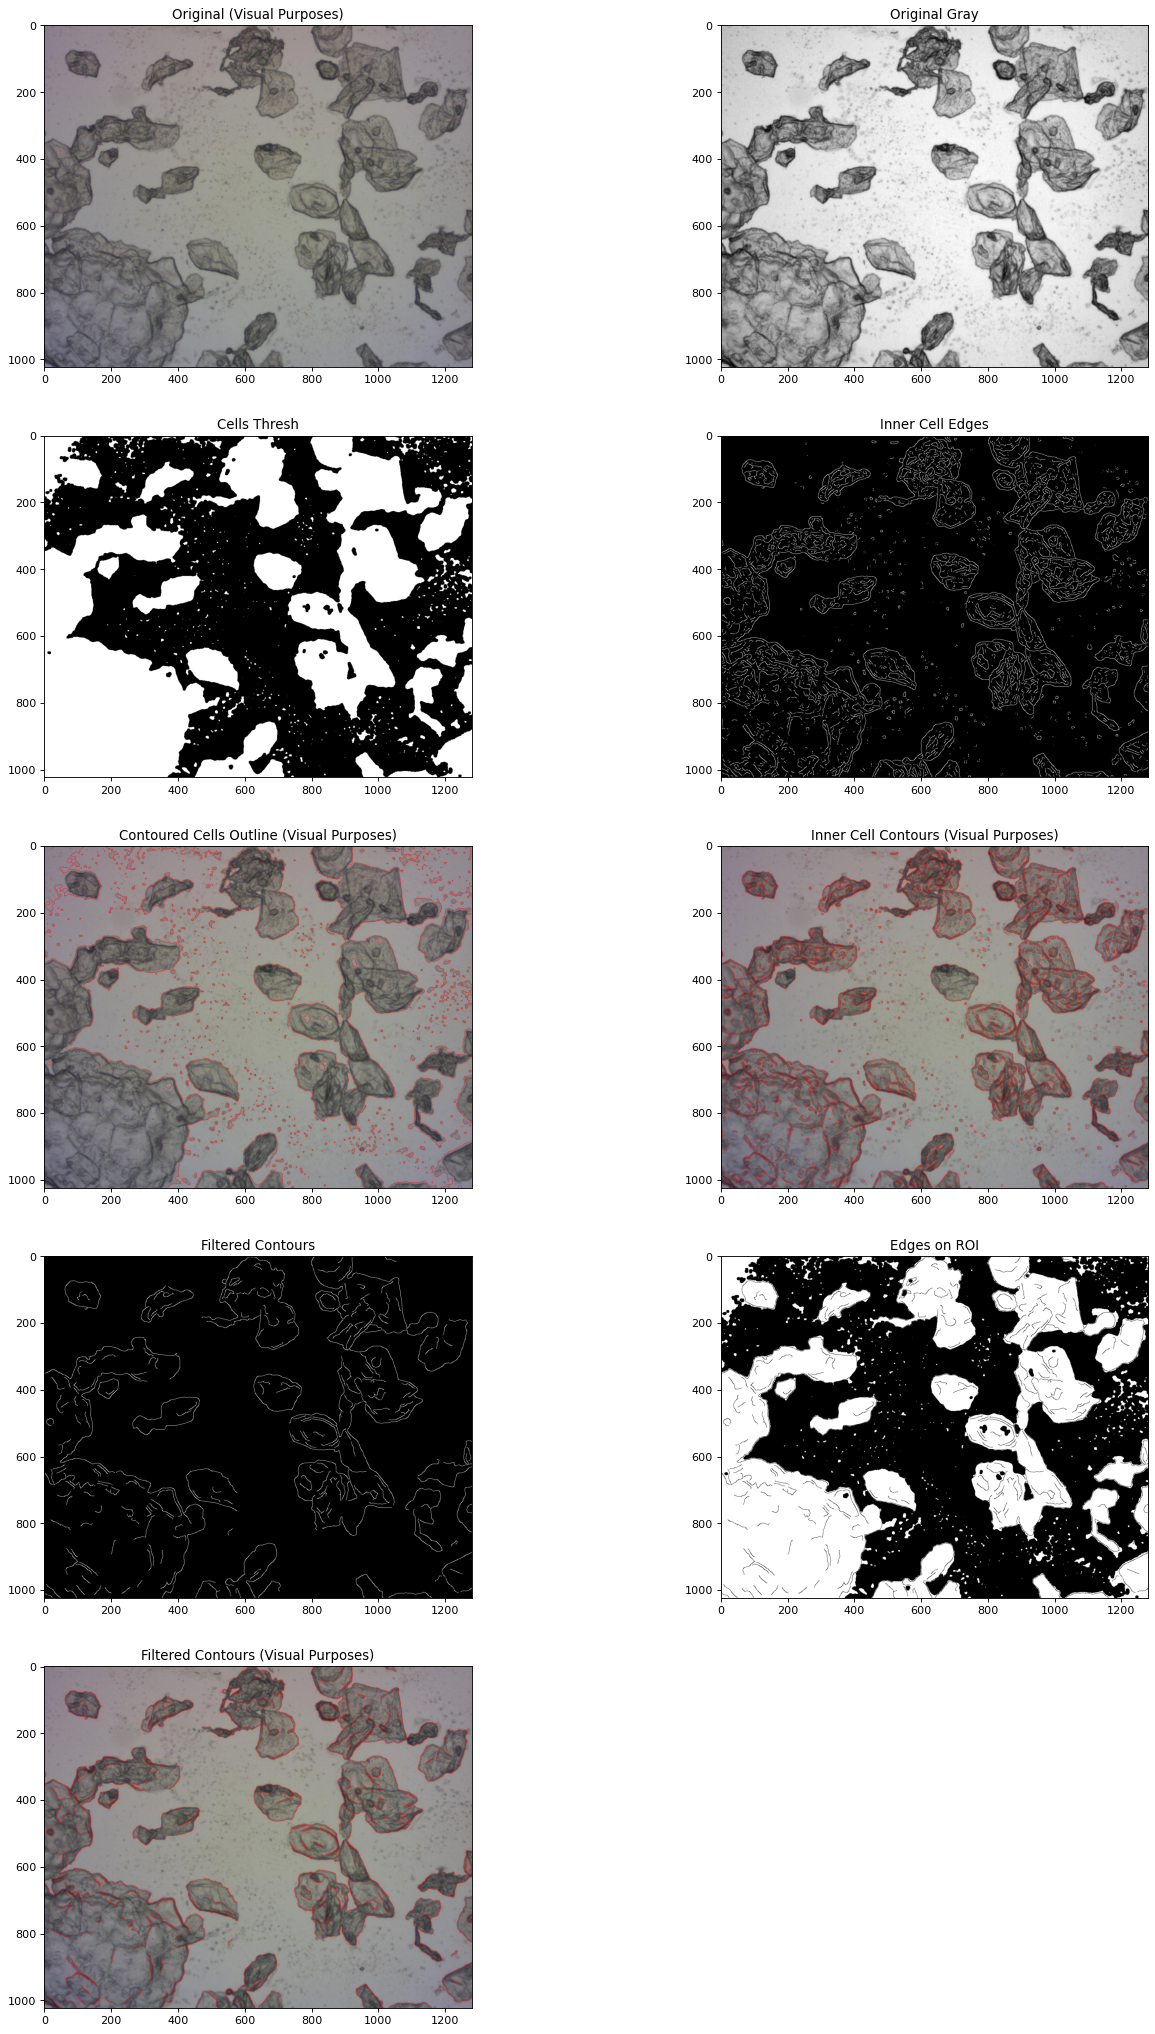

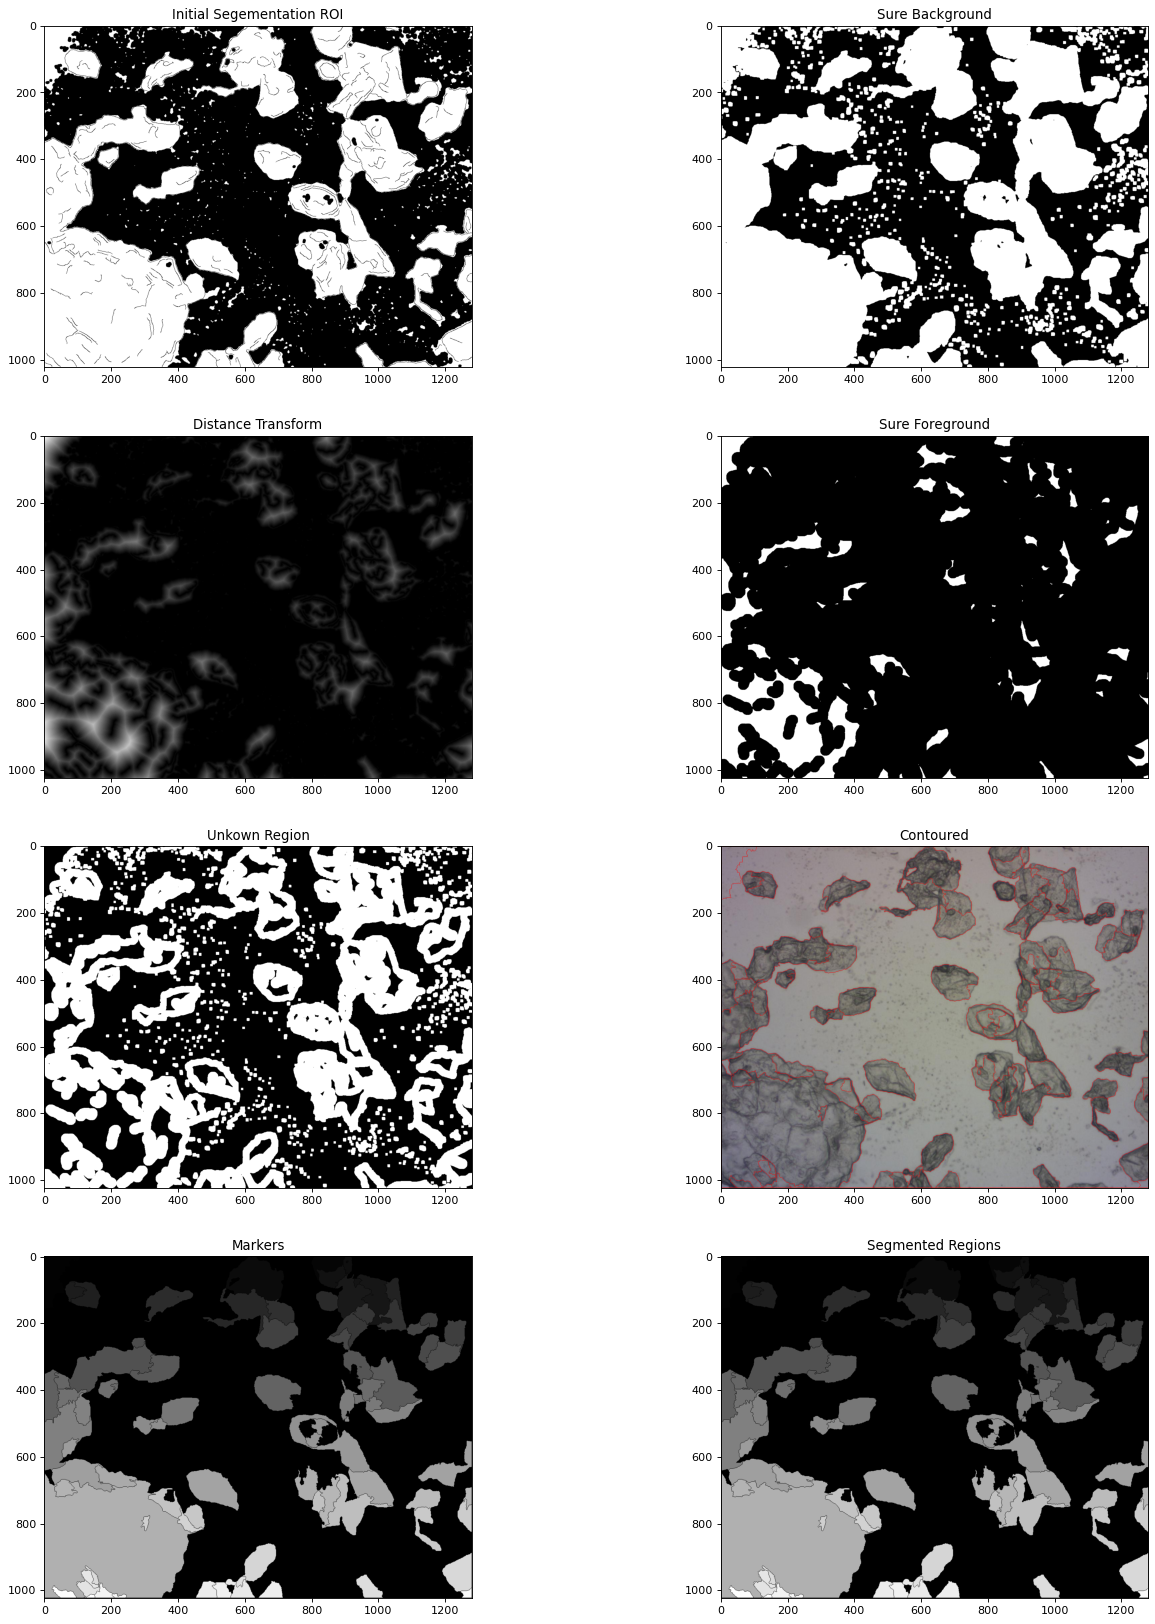

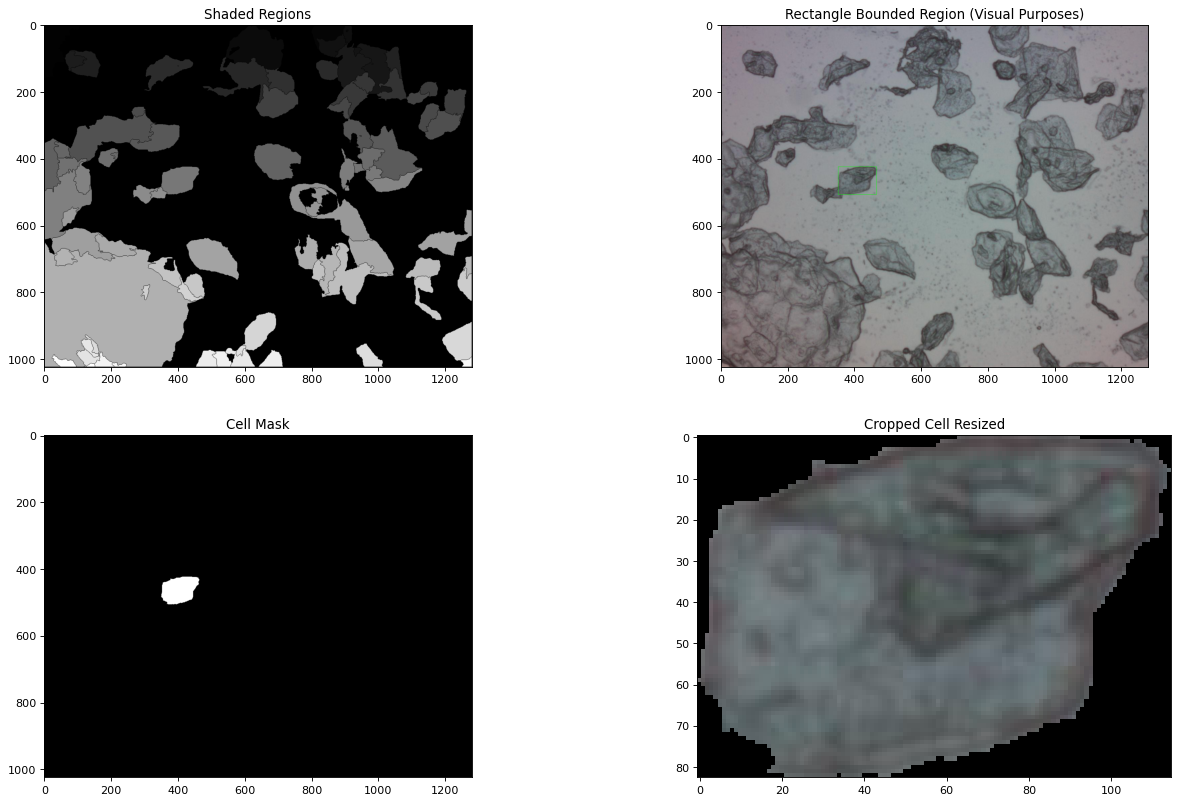

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import random
import easygui

# A method used for easily displaying many images at once
def displayImages(imageArray, titleArray, rows, columns):
    # Error checking
    if imageArray is None or titleArray is None:
        print("imageArray or titleArray is None")
        return
    if len(imageArray) != len(titleArray):
        print("Image array size does not math title array size!")
        return
    if rows is None:
        rows = 9
    if columns is None:
        columns = 2
    
    fig = plt.figure(num=None, figsize=(20, 60), dpi=80, facecolor='w', edgecolor='k')
    plt.rc('font', size=10)

    for i in range(len(imageArray)):
        place = str(rows) + str(columns) + str(i + 1)
        place = int(place)
        
        fig.add_subplot(int(rows), int(columns), int(i + 1))
        plt.title(titleArray[i])
        plt.set_cmap('gray')
        plt.imshow(imageArray[i]);


def process_image(I, outfilepath):
    """ ****************************************************************************************************************************************************
    IMAGE PRE-PROCESSING
    **************************************************************************************************************************************************** """
    # CONVERTING IMAGES TO COLOUR DIFFERENT SPACES
    imageOriginal = I.copy()
    imageRGB = cv2.cvtColor(imageOriginal, cv2.COLOR_BGR2RGB)
    imageGray = cv2.cvtColor(imageOriginal, cv2.COLOR_BGR2GRAY)

    h, w, d = imageOriginal.shape
    
    """ OBTAINING THE CELLS REGION OF INTEREST USING THRESHOLD """
    # ThresholdOffset used to increase the accuracy, it is adjusted based on the mean pixel value
    thresholdOffset = 0
    meanVal = np.mean(imageGray)
    if meanVal < 170 or meanVal > 200:
        thresholdOffset = -20
    # Image is blurred to get a smoother threshold
    imageGrayBlur = cv2.GaussianBlur(imageGray,(5,5), 0)
    # The threshold is obtained with a statistical threshold that utilizes the mean and standard
    # deviation of the pixel values
    statisticalThresh = np.mean(imageGray) + np.std(imageGray) + thresholdOffset
    _, cellsThresh = cv2.threshold(imageGray, thresh = statisticalThresh, maxval = 255, type = cv2.THRESH_BINARY)
    
    """ REDUCE NOISE OF ROI """
    # Noise is cleaned up before the contours of the image are obtained
    # Threshold is inverted
    cellsThresh = ~cellsThresh
    # A structuring element with a 9x9 kernel used for morphologyEx
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    # Morphological closing fills in the "holes" in the mask, this is done twice
    # Increasing the kernel size does not yeild desirable results and so I perform the operation twice
    newMask = cv2.morphologyEx(cellsThresh, cv2.MORPH_CLOSE, shape)
    newMask = cv2.morphologyEx(newMask, cv2.MORPH_CLOSE, shape)
    cellsThresh = newMask
    
    """ OBTAIN EDGES WITHIN IMAGE """ 
    # Inner cell edges (boundaries of intersecting cells etc.)
    # Image is blurred with an 11x11 kernel to get the desirable edges in most cases.
    # This is the optimal number found after a lot of testing, increasing the kernel size reduces
    # the number of important edges and reducing the size increases the number of noise edges
    imageGrayBlur = cv2.GaussianBlur(imageGray,(11, 11),0)
    # The threshold for Canny edge detection is adjected to the image size
    edgeSensitivity = 20
    if w > 1000 and h > 1000:
        edgeSensitivity = 30
    innerCellEdges = cv2.Canny(imageGrayBlur, edgeSensitivity, edgeSensitivity)
    
    """ FILTER THE CONTOURS """
    # Remove small and unimportant contours that are considered noise
    filteredContoursRGB = imageRGB.copy() # Image for display purposes
    filteredContours = np.zeros((h, w, 3), np.uint8)
    contours, _ = cv2.findContours(innerCellEdges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sorted in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for i in range(len(contours)):
        c = contours[i]
        (rectx, recty, rectw, recth) = cv2.boundingRect(c)
        
        # We get the "area" of a contour to determine it's size
        # From testing on various images of various sizes 300 appears to be a good number to 
        # use regardless of the size.
        if rectw * recth > 300:
            cv2.drawContours(filteredContours, contours, i, (255,255,255), 1);
            cv2.drawContours(filteredContoursRGB, contours, i, (255,0,0), 1);

    # The colour of the contours are inverted (white to black) and put on top of the
    # cells ROI. This image will be used to segment the cells in the next section.
    # The black contours will seperate the cells on the white ROI
    filteredContours = cv2.cvtColor(filteredContours, cv2.COLOR_BGR2GRAY)
    filteredContoursInv = ~filteredContours
    filteredContoursOnROI = cv2.bitwise_and(cellsThresh, cellsThresh, mask = filteredContoursInv)
    
    
    """ DISPLAY IMAGES FOR VISUAL PURPOSES """     
    # Contours of the cell edges (Visual Purposes Only)
    contours, _ = cv2.findContours(innerCellEdges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    innerCellContours = imageRGB.copy()
    cv2.drawContours(innerCellContours, contours, -1, (255,0,0), 1);
    
    # Contours are drawn in red over original image (Visual Purposes Only)
    contours, _ = cv2.findContours(innerCellEdges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    combinedEdgesContours = imageRGB.copy()
    cv2.drawContours(combinedEdgesContours, contours, -1, (255,0,0), 1);
    
    cellsOutlineContoured = imageRGB.copy()
    # The outline of all the cells is obtained from the threshold
    cellsOutline = cv2.Canny(cellsThresh, 0, 1)
    contours, _ = cv2.findContours(cellsOutline, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(cellsOutlineContoured, contours, -1, (255,0,0), 1);
    
    imageArray = [imageRGB, imageGray, cellsThresh, innerCellEdges, cellsOutlineContoured,
                  innerCellContours, filteredContours, filteredContoursOnROI, filteredContoursRGB
    ]
    titleArray = [
        'Original (Visual Purposes)', 'Original Gray', 'Cells Thresh', 'Inner Cell Edges',  'Contoured Cells Outline (Visual Purposes)',
        'Inner Cell Contours (Visual Purposes)', 'Filtered Contours', 'Edges on ROI', "Filtered Contours (Visual Purposes)"
    ]
    displayImages(imageArray, titleArray, 9, 2)
    
    
    
    """ ****************************************************************************************************************************************************
    SEGMENTATION
    **************************************************************************************************************************************************** """
    image = imageRGB.copy() # Visual Purposes Only
    roi = filteredContoursOnROI.copy()
    
    kernel = np.ones((3,3),np.uint8)
    # The black within the sureBackground image is the background we are sure of
    # This is achieved by expanding/dilating the region of interest
    sureBackground = cv2.dilate(roi, kernel, iterations=3)
    # Finding sure foreground area, this is the area we are certain is the ROI
    # Distance transform is used to better seperate the cells and threshold is used on the result of
    # distance transform to get the seperated cell centres
    # The 3rd parameter is the mask size and can range between the values of 0, 3, and 5
    distTransform = cv2.distanceTransform(roi, cv2.DIST_L2, 5)
    # 0.2 appears to work well on all the test images, this value is one of the factors that determines amount of separation
    ret, sureForeground = cv2.threshold(distTransform, 0.2*distTransform.max(), 255, 0)
    sureForeground = np.uint8(sureForeground)
    # The unknown region is the region that we're not certain is either the background or foreground
    # This region will be split/segmented by the watershed algorithm
    unknownRegion = cv2.subtract(sureBackground, sureForeground)

    # The sure foreground regions are marked/labelled with their own unique grayscale colour
    ret, markers = cv2.connectedComponents(sureForeground)
    # 1 is added so that the sure background is 1 and not 0. This is because the value 0 is reserved
    # for the unknown region. Watershed will consider the value 0 as the unknown region and so the background
    # value must be changed.
    markers += 1
    # The pixel value in the markers image is set to 0 where the same location in the unknown region is 255
    # This defines the unknown region within the markers image
    markers[unknownRegion==255] = 0
    
    # watershed() will segment the image. Remember that the background is set to 1 and the unknown region is set
    # to 0. The watershed method will "assign" the unknown region to the markers
    segmentedRegions = cv2.watershed(image, markers)
    # The copy of the original image is contoured red where the cells are segmented (Display purposes)
    # Watershed gives the boundary between regions as a -1 value
    image[segmentedRegions == -1] = [255,0,0]
    # Convert the border colour to 1 (The background colour) to prevent users clicking on the border
    segmentedRegions[segmentedRegions==-1] = 1

    # Display images
    imageArray = [roi, sureBackground, distTransform, sureForeground, unknownRegion, image, markers, segmentedRegions]
    titleArray = ["Initial Segementation ROI", "Sure Background", "Distance Transform", "Sure Foreground", "Unkown Region", "Contoured", "Markers", "Segmented Regions"]
    displayImages(imageArray, titleArray, 9, 2)
    
    
    
    """ ****************************************************************************************************************************************************
    CELL SELECTION
    **************************************************************************************************************************************************** """
    def selectCell(event, x, y, flags, param):
        # DisplayImg is used to store the images that will be used to display the progression of the algorithm at the end
        # The same goes for the image titles
        global displayImgs 
        global displayTitles
        
        # Left click
        if event == cv2.EVENT_LBUTTONDOWN: 
            # Get the pixel value that was clicked.
            color = shadedCells[y, x]

            if not np.any(color == 1):
                # Extract clicked region by setting the threshold to that pixel value
                threshVal = np.array(color) 
                roiMask = cv2.inRange(shadedCells, threshVal, threshVal) 

                # Get contours of clicked cell/region. There should only be one contour but it is sorted anyway
                # just to be safe
                contours, _ = cv2.findContours(roiMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                # Sorted in descending order
                contours = sorted(contours, key=cv2.contourArea, reverse=True)
                # Get the largest contour
                c = contours[0]

                # Extract the rectangle bounding box of the region. These dimensions will be used to
                # center and enlarge the image correctly
                rectX, rectY, rectW, rectH = cv2.boundingRect(c)
                cv2.rectangle(imageRGBSelect, (rectX,rectY), (rectX+rectW, rectY+rectH), (0,255,0), 1)

                # Cell is segmented and cropped using the mask
                segmentedCell = cv2.bitwise_and(imageOriginal, imageOriginal, mask = roiMask)
                croppedCell = segmentedCell[rectY : rectY + rectH, rectX : rectX + rectW]

                # Cell is extracted and resized. In other words it is enhanced
                resizeScale = 4
                dim = (int(rectW*resizeScale), int(rectH*resizeScale))
                enhancedCell = cv2.resize(croppedCell, dim, interpolation = cv2.INTER_AREA)

                # Images to be displayed are updated
                displayImgs = [shadedCells, imageRGBSelect, roiMask, croppedCell]
                displayTitles = ["Shaded Regions", "Rectangle Bounded Region (Visual Purposes)", "Cell Mask", "Cropped Cell Resized"]
                
                # Write to file and display on screen
                cv2.imwrite(outfilepath, enhancedCell)
                cv2.imshow("Cell Segmented", enhancedCell)
                # Close first window
                cv2.destroyWindow("Cells Select")
        
        # On mouse hover
        else:
            # Get the colour that is hovered over
            color = shadedCells[y, x]
            
            # If not hovering over a background colour
            if not np.any(color == 1) and not np.any(color == 255):
                # Create a mask of the cell
                startingImage2 = startingImage.copy()
                threshVal = np.array(color) 
                roiMask = cv2.inRange(shadedCells, threshVal, threshVal) 

                # Get contours of clicked cell/region. There should only be one contour
                contours, _ = cv2.findContours(roiMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                contours = sorted(contours, key=cv2.contourArea, reverse=True)
                cv2.drawContours(startingImage2, contours, 0, (0,0,255), 1);
                cv2.imshow("Cells Select", startingImage2)

            else:
                # Do not show any contours if a cell isn't hovered over
                cv2.imshow("Cells Select", startingImage)

    
    # The image first displayed when the user opens the program. This is the main image
    startingImage = imageOriginal.copy()
    imageRGBSelect = imageOriginal.copy() # Algorithm progression display purposes
    # shadedCells is final image from the segmentation section. Each cell is "shaded" with a unique colour
    shadedCells = segmentedRegions.copy()
    
    # Display purposes array
    global displayImgs
    global displayTitles
    displayImgs = []
    displayTitles = []
    
    cv2.namedWindow("Cells Select") 
    val = cv2.setMouseCallback("Cells Select", selectCell) 
    cv2.imshow("Cells Select", startingImage)
    key = cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Display images
    displayImages(displayImgs, displayTitles, 9, 2)
    
    
easygui.msgbox("""
Instructions:\n
With the left mouse button click on a cell you would like to enlarge, the cell you are hovering over will be outlined in red.\n
It will be enlarged by 4 times the original size.\n
The clicked cell will display on screen and the first window will close. The enlarged cell will be saved to a file: "YourImageName - Final.jpg"\n
Once you are finished please close the window.
""")

# Please do not change the following lines of code
Colour = cv2.imread('Cervical Colour.jpg')
Mono = cv2.imread('Cervical Mono.jpg')

process_image(Colour, 'Cervical Colour - Final.jpg')
process_image(Mono, 'Cervical Mono - Final.jpg')